In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [2]:
# paths for input files
main_data_path = 'outputs/Clean_total_df.csv'
outdoor_data_path = 'Resources/08_outdoor_recreation_by_state/08_Outdoor_recreation_by_state.csv'

In [3]:
# Bring in the csv's as dataframes
main_df = pd.read_csv(main_data_path, index_col = 0)
outdoor_df = pd.read_csv(outdoor_data_path)

In [4]:
# Our hypothesis is that if the outdoors is more important to a population's
# collective livelihoods, that population will emit less CO2 per capita.
# We will need the following to examine this:
# State, 

In [5]:
main_df = main_df.loc[ : , ['State',
 'Household Income',
 'Population',
 'Median Age',
 'CO2\n(Metric Tons)',
 'Per Capita Income',
 'Poverty Count',
 'Unemployment Count']]

In [6]:
h2_df = main_df.merge(outdoor_df, how='left', on='State')

In [7]:
h2_df.dtypes

State                                     object
Household Income                         float64
Population                               float64
Median Age                               float64
CO2\n(Metric Tons)                         int64
Per Capita Income                        float64
Poverty Count                            float64
Unemployment Count                       float64
Total Outdoor Recreation Value Added      object
Percent of Total Value Added             float64
Total Outdoor Recreation Employment       object
Percent of Total Employment              float64
Total Outdoor Recreation Compensation     object
Percent of Total Compensation            float64
dtype: object

In [8]:
h2_df['per_captia_emissions'] = h2_df['CO2\n(Metric Tons)'] / h2_df['Population']

In [9]:
h2_df

,State,Household Income,Population,Median Age,CO2\n(Metric Tons),Per Capita Income,Poverty Count,Unemployment Count,Total Outdoor Recreation Value Added,Percent of Total Value Added,Total Outdoor Recreation Employment,Percent of Total Employment,Total Outdoor Recreation Compensation,Percent of Total Compensation,per_captia_emissions
0,MN,68411.0,5527358.0,37.9,119220500,36245.0,547442.0,119218.0,"9,638,553,000",2.7,"101,035",3.4,"4,505,794,000",2.2,21.569166
1,NH,74057.0,1343622.0,42.7,8762252,38548.0,102352.0,30392.0,"2,710,336,000",3.3,"37,818",5.5,"1,315,354,000",2.9,6.521367
2,NJ,79363.0,8881845.0,39.8,75646992,40895.0,904132.0,285084.0,"11,222,802,000",1.9,"139,017",3.3,"6,070,879,000",1.9,8.517036
3,NY,65323.0,19618453.0,38.7,111745556,37470.0,2797985.0,602636.0,"26,299,866,000",1.6,"293,447",3.0,"14,178,838,000",1.7,5.695941
4,RI,63296.0,1056611.0,39.9,13391436,34619.0,133055.0,34479.0,"1,391,601,000",2.3,"21,642",4.3,"748,122,000",2.2,12.673951
5,VT,60076.0,624977.0,42.9,39904,33238.0,67034.0,13878.0,"1,468,493,000",4.5,"17,301",5.3,"612,583,000",3.2,0.063849
6,WA,70116.0,7294336.0,37.6,42643396,36888.0,821621.0,198330.0,"11,535,055,000",2.2,"128,991",3.7,"5,850,632,000",2.2,5.846097
7,CA,71228.0,39148760.0,36.3,174315472,35021.0,5487141.0,1321502.0,"52,120,252,000",1.9,"588,680",3.3,"27,383,466,000",1.9,4.452644
8,CO,68811.0,5531141.0,36.6,138851576,36415.0,590504.0,139326.0,"11,308,942,000",3.3,"146,178",5.3,"5,963,912,000",3.1,25.103604
9,CT,76106.0,3581504.0,40.8,38365936,43056.0,348449.0,125909.0,"3,594,652,000",1.4,"48,390",2.8,"1,923,607,000",1.4,10.712242


In [10]:
def reg_plot(x_values, y_values, x_label, y_label, title, text_x, text_y):
    # this is all the same as quick_plot
    plt.scatter(x_values,y_values,  edgecolors='b')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{title}")
    # here's where we get the regression and generate a line equation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(text_x,text_y),fontsize=15,color="red")
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    # I chose the name the output plots using the title.
    file_name = f"outputs/{title}.png"
    plt.savefig(file_name)
    plt.show()

The r-squared is: 0.00848627606863196


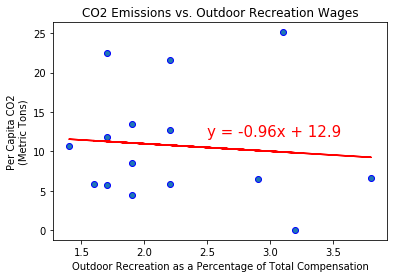

In [11]:
reg_plot(h2_df['Percent of Total Compensation'],
               h2_df['per_captia_emissions'],
              'Outdoor Recreation as a Percentage of Total Compensation',
              'Per Capita CO2\n(Metric Tons)',
              'CO2 Emissions vs. Outdoor Recreation Wages',
                2.5,
                12)

The r-squared is: 0.018881224015624927


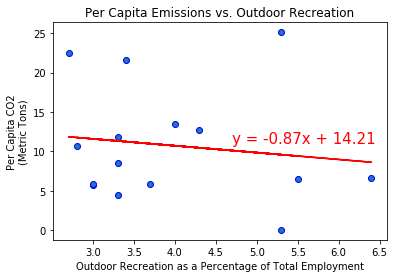

In [13]:
reg_plot(h2_df['Percent of Total Employment'],
               h2_df['per_captia_emissions'],
              'Outdoor Recreation as a Percentage of Total Employment',
              'Per Capita CO2\n(Metric Tons)',
              'Per Capita Emissions vs. Outdoor Recreation',
                4.7,
                11)